In [1]:
import pandas as pd
import numpy as np
import os
#Plots:
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# filepath = os.path.abspath('../data/Enron_Kaggle_dataset/email_data.csv') # Full dataset +500K emails
filepath = os.path.abspath('../data/Enron_Kaggle_dataset/Network_analytics.csv') # Subset with 1K Random Emails

In [3]:
# filepath = "Enron_Kaggle_dataset/Enron_2001.csv" ### VErsion for testing code is running

# Read the data into a pandas dataframe called emails
df = pd.read_csv(filepath)

#Convert date column to datetime 

df["Date"] = pd.to_datetime(df.Date, utc= True) 

### Adding classification by year to dataframe:

df['year'] = pd.DatetimeIndex(df['Date']).year

In [4]:
full_dataset = df   #### +500K Emails
display(full_dataset.shape)
full_dataset.head(2)

(1000, 10)

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year
0,Enron announces UNLIMITED discounted AstroWor...,enron.announcements@enron.com,may-l,2001-04-25 22:55:00+00:00,Enron Astroworld Tickets,\Lawrence_May_Jun2001_1\Notes Folders\All docu...,all.houston@enron.com,NaN,May-L,2001
1,Mime-Version: 1.0 Content-Type: text/plain; ch...,jeffrey.keeler@enron.com,kean-s,2000-07-13 07:42:00+00:00,AP story on OFA Lawsuit in NY,\Steven_Kean_Dec2000_1\Notes Folders\Mtbe,"james.prentice@enron.com, stanley.horton@enron...",NaN,KEAN-S,2000


## Selection of small subset for development:

In [5]:
# # Uncomment if neccesary 

### Selection of smaller subset for development:

df = df.loc[np.random.choice(df.index, 1000, replace=False)] # Random Emails

# ### Saving csv for deployment:
df_csv = df.to_csv('../data/Enron_Kaggle_dataset/Network_analytics.csv', index=False)

In [6]:
### Selection of year of interest:

year_of_interest = 2000
df = df.loc[df['year'] == year_of_interest]
display(df.shape)

(391, 10)

In [7]:
df.columns.to_list()

['email-body',
 'From',
 'employee',
 'Date',
 'Subject',
 'X-Folder',
 'To',
 'X-cc',
 'X-Origin',
 'year']

In [8]:
# df = df.drop(['Date','Subject','X-Folder','X-cc','X-Origin','email-body'], axis=1)
df = df.drop(['Date','Subject','X-Folder','X-cc','email-body'], axis=1)

df.head()

,From,employee,To,X-Origin,year
235,steve.young@enron.com,buy-r,david.hardy@enron.com,Buy-R,2000
35,peter.ghavami@enron.com,beck-s,sally.beck@enron.com,Beck-S,2000
347,darron.giron@enron.com,giron-d,audrey.cook@enron.com,Giron-D,2000
55,angela.davis@enron.com,griffith-j,"worthy@enron.com, brian.kerrigan@enron.com, da...",GRIFFITH-J,2000
957,theresa.wiesmann@enron.com,rogers-b,benjamin.rogers@enron.com,Rogers-B,2000


In [9]:
df_group = df.groupby(['From','employee','To'], as_index=False).count()
df_group.rename(columns={'X-Origin':'freq'}, inplace=True)


In [10]:
df_group.sort_values(by='freq', ascending= False).head(20)

,From,employee,To,freq,year
200,leslie.hansen@enron.com,jones-t,tana.jones@enron.com,3,3
166,kate.symes@enron.com,symes-k,stephanie.piwetz@enron.com,3,3
361,vince.kaminski@enron.com,kaminski-v,vkaminski@aol.com,3,3
182,kay.mann@enron.com,mann-k,nwodka@bracepatt.com,3,3
178,kay.mann@enron.com,mann-k,"kathleen.clark@enron.com, barton.clark@enron.c...",2,2
347,truorange@aol.com,dean-c,truorange@aol.com,2,2
111,fool@motleyfool.com,rogers-b,benjamin.rogers@enron.com,2,2
224,matthew.lenhart@enron.com,lenhart-m,stadogb@email.msn.com,2,2
195,larry.campbell@enron.com,campbell-l,spendegr@enron.com,2,2
205,mandy.bowles@email.moore.com,nemec-g,gerald.nemec@enron.com,2,2


In [11]:
# Shape of df
df_group.shape

(366, 5)

In [12]:
df_group.head()

,From,employee,To,freq,year
0,aiaz_kazi@versata.com,dasovich-j,"asama@yahoo.com, kelly@haas.berkeley.edu, jdas...",1,1
1,alamonsoff@watersinfo.com,kaminski-v,"pratt@kochind.com, gkla@dynegy.com, lynda.clem...",1,1
2,alan.aronowitz@enron.com,shackleton-s,"john.viverito@enron.com, sara.shackleton@enron...",1,1
3,alan.comnes@enron.com,kean-s,steven.kean@enron.com,1,1
4,aleck.dadson@enron.com,dasovich-j,jeff.dasovich@enron.com,1,1


In [13]:
# How many people are we studying?
df_group['employee'].nunique()

65

In [14]:
import networkx as nx

## Creating Graph nx

In [15]:
## Creating a Graph

g=nx.Graph()

### Building nodes and edges:

for idx, feature in df_group.iterrows():
    
    g.add_edge(feature[1],feature[2],weight=feature[3]) #Representing the weight of connection between two people

## Exploring nodes and edges:

In [16]:
#Return list of nodes and edges

nodes = g.nodes(data=True)
edges = g.edges(data=True)

In [17]:
### Exploring order of information :

for node, adjacencies in enumerate(g.adjacency()):
    print("Node:", node)
    print('Pos 0:', adjacencies[0])
    print(type(adjacencies[0]))

    print('Pos 1:', adjacencies[1].keys())
    print(type(adjacencies[1]))
    print('Weight:', adjacencies[1].values())


    print('\n ')
    
    if node == 3:
        break



Node: 0
Pos 0: dasovich-j
<class 'str'>
Pos 1: dict_keys(['asama@yahoo.com, kelly@haas.berkeley.edu, jdasovic@enron.com', 'jeff.dasovich@enron.com', 'bcherry@sempra.com, jleslie@luce.com, eke@aelaw.com, kmccrea@sablaw.com, \n\trmp@cpuc.ca.gov, jdasovic@enron.com, tomb@crossborderenergy.com, \n\tburkee@cts.com, paulamirault@aec.ca, alexanms@sce.com, \n\tcraigc@calpine.com, bdingwall@unitedgas.com, \n\tdouglass@arterhadden.com, jfawcet@enron.com, porterdk@sce.com, \n\trochmanm@spurr.org, rick.counihan@greenmountain.com, \n\tdavid.bayless@utility.com, mday@gmssr.com, jmpa@dynegy.com, \n\tjohnj@bcjlaw.com, rfoss@coral-energy.com, nmcvay@socalgas.com, \n\tjaime.ramirez@swgas.com, larry.black@swgas.com', 'athomas@newenergy.com, alippin@mail.arco.com, cohnap@sce.com, \n\tanw@cpuc.ca.gov, anna.ferrera@sen.ca.gov, debinorton@aol.com, \n\tmoravekj@sce.com, brbarkovich@earthlink.net, bakilbourne@calpx.com, \n\twbooth@booth-law.com, cra@calretailers.com, \n\twkeese@energy.state.ca.us, bzobel@mail.

In [18]:
for node in g.edges():
    
    print(g.edges[node]) ### This give me the weight assigned to the edge
    print(g.edges[node]['weight']) ### This give me the weight assigned to the edge
    print(type(g.edges[node]['weight']))
    
print(len(g.edges()))

{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight': 1}
1
<class 'int'>
{'weight':

In [19]:
#### Exploring order of information:

for counter, edge in enumerate(g.edges()):
    print(type(edge))
    print('\n')
    print(edge[0])
    print(edge[1])
    if counter == 3:
        break

<class 'tuple'>


dasovich-j
asama@yahoo.com, kelly@haas.berkeley.edu, jdasovic@enron.com
<class 'tuple'>


dasovich-j
jeff.dasovich@enron.com
<class 'tuple'>


dasovich-j
bcherry@sempra.com, jleslie@luce.com, eke@aelaw.com, kmccrea@sablaw.com, 
	rmp@cpuc.ca.gov, jdasovic@enron.com, tomb@crossborderenergy.com, 
	burkee@cts.com, paulamirault@aec.ca, alexanms@sce.com, 
	craigc@calpine.com, bdingwall@unitedgas.com, 
	douglass@arterhadden.com, jfawcet@enron.com, porterdk@sce.com, 
	rochmanm@spurr.org, rick.counihan@greenmountain.com, 
	david.bayless@utility.com, mday@gmssr.com, jmpa@dynegy.com, 
	johnj@bcjlaw.com, rfoss@coral-energy.com, nmcvay@socalgas.com, 
	jaime.ramirez@swgas.com, larry.black@swgas.com
<class 'tuple'>


dasovich-j
athomas@newenergy.com, alippin@mail.arco.com, cohnap@sce.com, 
	anw@cpuc.ca.gov, anna.ferrera@sen.ca.gov, debinorton@aol.com, 
	moravekj@sce.com, brbarkovich@earthlink.net, bakilbourne@calpx.com, 
	wbooth@booth-law.com, cra@calretailers.com, 
	wkeese@energy.s

NOTE
There are two ways to list nodes in the graph. g.nodes() produces a list of nodes, and g.nodes_iter() produces a Python iterator. An iterator is limited to use in loops only—but takes significantly less memory and is faster on large graphs

In [20]:
# Returns nodes along with their atributes (as a dictionary):

# g.nodes(data=True)
# g.edges(data=True)

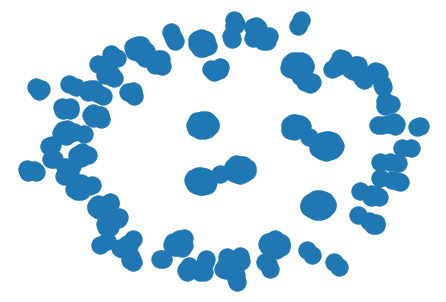

In [21]:
### A first preview of the network:
nx.draw(g)

This is due to the data being largely fragmentary and incomplete; we should concern ourselves with the largest component of the network only

In [22]:
# # Connected_component_subgraphs() returns subsets compounds by nodes and edges.

# components= nx.connected_components(g)  ### A generator of sets of nodes, one for each component of G
# components=max(nx.connected_components(g), key=len) ### Getting the the largest connected component

# # To create the induced subgraph of each component use:

# S = [g.subgraph(c) for c in components]

In [23]:
# # Get positions for the nodes in G
pos_ = nx.spring_layout(g)    ### A layout for displaying better the subgraphs

In [25]:
# nx.draw(S[1])
# nx.draw(S[2])

### How can I interpret this plot?
#What is it representing each node?

In [27]:
# nx.draw_networkx(S[0], with_labels=True)   ##"Not helpful"

In [29]:
# # How many netkwork graphs do I have? Are you sure is that what S represents?
# len(S)

## Graphs using Plotly

### Create graph class

In [168]:
def graph_nx_class(dataset):
    
    ## Creating a Graph class

    G = nx.Graph()

    ### Assigning nodes and edges:

    for idx, feature in dataset.iterrows():

        G.add_edge(feature[1],feature[2],weight=feature[3]) #Representing the weight of connection between two people

    ### Layout for graphs:

    pos_ = nx.spring_layout(G)    ### A layout for displaying better the subgraphs
    
    return G, pos_

G, pos_ = create_graph_nx_class(df_group)

In [174]:
def make_graph_nx(G,pos_,mode):
    
    #### Create nodes to plot:

    node_x = []
    node_y = []

    for count, node in enumerate(G.nodes()):
        x, y = pos_[node]
        node_x.append(x)
        node_y.append(y)


    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='Viridis',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))
    
#####################################################

    ### Create edges to plot:

    edge_x = []
    edge_y = []

    for edge in G.edges():

        weight_edges = G.edges()[edge]['weight']

        char_1 = edge[0]
        char_2 = edge[1]
        x0, y0 = pos_[char_1]
        x1, y1 = pos_[char_2]

        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

        edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width= 0.8*weight_edges**2, color='#888'),   ###Define the line connecting nodes
        hoverinfo='none',
        mode='lines')
        
################################################
        
    node_adjacencies = []
    node_text = []

    for node, adjacencies in enumerate(G.adjacency()):

        node_adjacencies.append(len(adjacencies[1]))
        node_text.append('#Employee: '+str(adjacencies[0]))

#     node_trace.marker.size = node_adjacencies    
#     node_trace.text = node_text
    
    if mode == 'color':
        node_trace.marker.color = node_adjacencies    
        node_trace.text = node_text
    elif mode == 'size':
        node_trace.marker.size = node_adjacencies    
        node_trace.text = node_text
        
    
###########################################################""

    ### Plot results:

    fig = go.Figure(data=[edge_trace, node_trace],
         layout=go.Layout(
            title='<br>Testing Network graph made with Python',
            titlefont_size=16,
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20,l=5,r=5,t=40),
            annotations=[ dict(
                text="1,2,3 Testing",
                showarrow=False,
                xref="paper", yref="paper",
                x=0.005, y=-0.002 ) ],
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
            )

    return fig.show()

In [175]:
# # lista con nombres de interes:
# for node,adj in enumerate(G.adjacency()):
#     print(str(adj[0]))

## Full network by color

In [176]:
G, pos_ = graph_nx_class(df_group)
node_adjacencies = make_graph_nx(G,pos_, 'color')

## Full Network by size

In [177]:
G, pos_ = graph_nx_class(df_group)
node_adjacencies = make_graph_nx(G,pos_, 'size')

## Subgraph of full network

In [78]:
# [len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]

In [82]:
G, pos_ = create_graph_nx_class(df_group)

In [178]:
def make_nx_subgraph(G, poi):


    # A generator of sets of nodes, one for each component of G
    # Generate a sorted list of connected components, largest first.

    components= sorted(nx.connected_components(G), key=len, reverse=True)
#     components= nx.connected_components(G)


#     #Getting sets of nodes:

    s = [G.subgraph(c) for c in components]
    print('Available nx subsets :',len(s))
    G = s

    node_x = []
    node_y = []

    text =' '

    ###################


    # Custom function to create an edge between node x and node y, with a given text and width
    def make_edge(x, y, text, width):
        return  go.Scatter(x         = x,
                           y         = y,
                           line      = dict(width = width,
                                       color = '#488'),
                           hoverinfo = 'text',
                           text      = ([text]),
                           mode      = 'lines')

    ###############################

    for count, node in enumerate(G[poi].nodes()):
        x, y = pos_[node]
        node_x.append(x)
        node_y.append(y)


    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='YlGnBu',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    ### Create edges to plot:

    edge_x = []
    edge_y = []
    edge_trace = [] #For each edge, make an edge_trace, append to list


    for edge in G[poi].edges():

        weight_edge = G[poi].edges()[edge]['weight']

        char_1 = edge[0]
        char_2 = edge[1]
        x0, y0 = pos_[char_1]
        x1, y1 = pos_[char_2]

    ##################
        trace  = make_edge([x0, x1, None], [y0, y1, None], text, 
                                   width = 0.3*weight_edge**2.2)
        edge_trace.append(trace)
    ##################

        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    ##########################################################################""

    node_adjacencies = []
    node_text = []
    
    for node, adjacencies in enumerate(G[poi].adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append(' '+str(adjacencies[0]))


    node_trace.marker.color = node_adjacencies    #### Color or size???? trace.marker.color or .size
    node_trace.text = node_text


    #################
    # Customize layout
    layout = go.Layout(
    #     paper_bgcolor='rgba(0,0,0,0)', # transparent background
    #     plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
        xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
        yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
    )
    ################

    ### Create Network Graph:

    # Create figure
    fig = go.Figure(layout = layout)
    # Add all edge traces
    for trace in edge_trace:
        fig.add_trace(trace)
    # Add node trace
    fig.add_trace(node_trace)
    # Remove legend
    fig.update_layout(showlegend = False)
    # Remove tick labels
    fig.update_xaxes(showticklabels = False)
    fig.update_yaxes(showticklabels = False)
    # Show figure
    
    return fig.show()

In [142]:
make_network_subgraph(G,0)

Available nx subsets : 61


In [159]:
def make_network_graph_weight(G, pos_):


    # A generator of sets of nodes, one for each component of G
    # Generate a sorted list of connected components, largest first.

    components= sorted(nx.connected_components(G), key=len, reverse=True)


    node_x = []
    node_y = []

    text =' '

    ###################


    # Custom function to create an edge between node x and node y, with a given text and width
    def make_edge(x, y, text, width):
        return  go.Scatter(x         = x,
                           y         = y,
                           line      = dict(width = width,
                                       color = '#488'),
                           hoverinfo = 'text',
                           text      = ([text]),
                           mode      = 'lines')

    ###############################

    for count, node in enumerate(G.nodes()):
        x, y = pos_[node]
        node_x.append(x)
        node_y.append(y)


    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='Viridis',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    ### Create edges to plot:

    edge_x = []
    edge_y = []
    edge_trace = [] #For each edge, make an edge_trace, append to list


    for edge in G.edges():

        weight_edge = G.edges()[edge]['weight']

        char_1 = edge[0]
        char_2 = edge[1]
        x0, y0 = pos_[char_1]
        x1, y1 = pos_[char_2]

    ##################
        trace  = make_edge([x0, x1, None], [y0, y1, None], text, 
                                   width = 0.1*weight_edge**3)
        edge_trace.append(trace)
    ##################

        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    ##########################################################################""

    node_adjacencies = []
    node_text = []
    
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append(' '+str(adjacencies[0]))


    node_trace.marker.color = node_adjacencies   
    node_trace.text = node_text


    ### Create Network Graph:

    # Create figure
    fig = go.Figure(layout = layout)
    # Add all edge traces
    for trace in edge_trace:
        fig.add_trace(trace)
    # Add node trace
    fig.add_trace(node_trace)
    # Remove legend
    fig.update_layout(showlegend = False)
    # Remove tick labels
    fig.update_xaxes(showticklabels = False)
    fig.update_yaxes(showticklabels = False)
    # Show figure
    
    return fig.show()

In [160]:
G, pos_ = create_graph_nx_class(df_group)
make_network_graph_weight(G, pos_)